# Pokemon Dataset - Exploratory Data Analysis 


This [dataset](https://www.kaggle.com/datasets/abcsds/pokemon) includes 721 Pokemons, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

The data as described by Myles O'Neill is:

#: ID for each pokemon
Name: Name of each pokemon
Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
Type 2: Some pokemon are dual type and have 2
Total: sum of all stats that come after this, a general guide to how strong a pokemon is
HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
Attack: the base modifier for normal attacks (eg. Scratch, Punch)
Defense: the base damage resistance against normal attacks
SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
SP Def: the base damage resistance against special attacks
Speed: determines which pokemon attacks first each round


The goal of this project is to run a EDA using very common Python commands and some very helful, but not so common.

# Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#pip freeze > requirements.txt

# Loading the dataset

In [3]:
df = pd.read_csv('datasets/pokemon.csv')

# Basic information about the dataset

We will start the analysis with the general overview about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Removind spaces and special characters in the columns names.

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '', regex=True)
df = df.rename(columns ={'#': "id_poke"})
df.head(2)

,id_poke,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


As the dataset has 800 lines, but it was informed 721. Checking if we have different Names for repeated IDs.

In [6]:
print("Unique IDs: ", df.id_poke.nunique())

print("Unique Names: ", df.name.nunique())

Unique IDs:  721
Unique Names:  800


The filter shows that id_poke represents a kind of family, because when they are the same, the main name is also the same.

In [7]:
df[df.groupby("id_poke")['id_poke'].transform(len) > 1]

,id_poke,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


As the 'names' are unique, they will be converted into index.

In [8]:
df = df.set_index('name')

In [9]:
df.head(2)

,id_poke,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False


'type_2' has 386 null values or 48.25%, because not all Pokemons have this  classification.

In [10]:
print('Total null values: ', df.isnull().sum().sort_values(ascending=False)[:1])
print('Perc of null values: ', (df.isnull().sum()/len(df)).sort_values(ascending=False)[:1])

Total null values:  type_2    386
dtype: int64
Perc of null values:  type_2    0.4825
dtype: float64


# Statistics

For this section we will explore the data to get some insights.

Below we can see the data range, variation, quartiles, min and max for each numeric variable.

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_poke,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
hp,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
sp_atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
sp_def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


The table shows the average for speed, attack and defense for eadch type.

In average the most fast type is "Flying", ie.

In [12]:
df.groupby(['type_1'])[['speed', 'attack', 'defense', 'total']].mean().transpose().style.background_gradient(cmap='Blues', axis=1).format(precision=2)

type_1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
speed,61.68,76.16,83.03,84.50,48.59,66.07,74.44,102.50,64.34,61.93,63.91,63.46,71.55,63.57,81.49,55.91,55.26,65.96
attack,70.97,88.39,112.12,69.09,61.53,96.78,84.77,78.75,73.78,73.21,95.75,72.75,73.47,74.68,71.46,92.86,92.70,74.15
defense,70.72,70.23,86.38,66.30,65.71,65.93,67.77,66.25,81.19,70.80,84.84,71.42,59.85,68.82,67.68,100.80,126.37,72.95
total,378.93,445.74,550.53,443.41,413.18,416.44,458.08,485.00,439.56,421.14,437.50,433.46,401.68,399.14,475.95,453.75,487.70,430.46


The same idea as before, but using the max.

Psychic has the strongest attack, more speed and very good defense.

In [13]:
df.groupby(['type_1'])[['speed', 'attack', 'defense', 'total']].max().transpose().style.background_gradient(cmap='Blues', axis=1)

type_1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
speed,160,125,120,140,99,118,126,123,130,145,120,110,135,130,180,150,110,122
attack,185,150,180,123,131,145,160,115,165,132,180,130,160,106,190,165,150,155
defense,230,125,130,115,95,95,140,80,145,131,160,184,126,120,160,200,230,180
total,600,680,780,610,680,625,680,580,680,630,770,580,720,535,780,700,700,770


Below we see the min for the variables attack, defense and speed.

In [14]:
df.groupby(['type_1'])[['speed', 'attack', 'defense', 'total']].min().transpose().style.background_gradient(cmap='Blues', axis=1)

type_1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
speed,5,20,40,35,15,25,20,55,20,10,10,25,5,25,20,10,23,15
attack,10,50,50,30,20,35,30,30,30,27,40,30,5,43,20,40,24,10
defense,30,30,35,15,28,30,37,35,30,30,25,15,5,35,15,40,50,20
total,194,220,300,205,218,210,250,245,275,180,265,250,190,245,198,280,300,200


# Descriptions

This cross-table is showing the second nature of the pokemons, type 1 vs type 2. Important to remember that 48.25% of the pokemons only have one type.

In [34]:
pd.crosstab(df.type_1, df.type_2, margins=True)

type_2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,All
type_1,,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,12,0,3,7,1,52
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0,21
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,0,4,0,0,0,21
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,0,0,0,3,1,17
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,0,2,0,7
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,0,2,1,1,1,24
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,4,0,0,0,0,22


Same table as before, but highlighting the biggest numbers.

In [17]:
pd.crosstab(df.type_1, df.type_2).style.background_gradient(cmap='Blues')

type_2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
type_1,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,12,0,3,7,1
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,0,4,0,0,0
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,0,0,0,3,1
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,0,2,0
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,0,2,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,4,0,0,0,0


As informed, the same information is visualized in a different way as reference for different code options in Python.

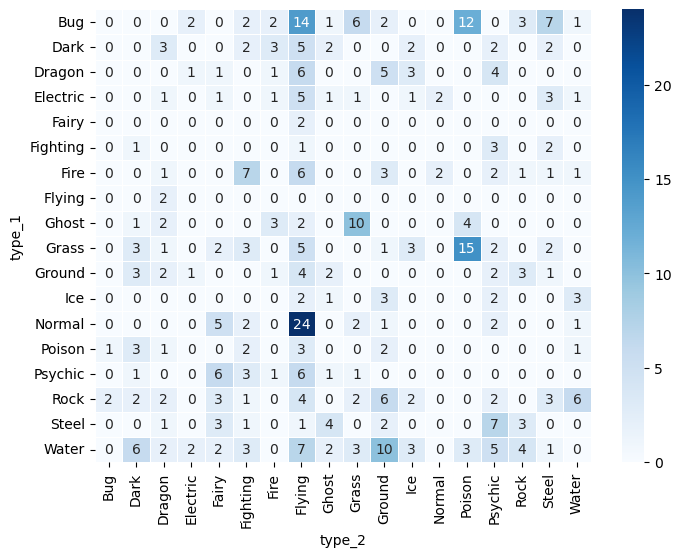

In [18]:
%matplotlib inline 
plt.figure(figsize=(8,6), dpi=100) #manage the size of the plot
sns.heatmap(pd.crosstab(df.type_1, df.type_2), linewidths=0.5, annot=True, cmap='Blues')
plt.show()

How many type 1 and 2 there are in the dataset.

In [19]:
df_abt = pd.merge(df.type_1.value_counts().to_frame(), df.type_2.value_counts().to_frame(), left_index=True, right_index=True)
df_abt.loc['Column_Total']= df_abt.sum(numeric_only=True, axis=0)
df_abt.loc[:,'Row_Total'] = df_abt.sum(numeric_only=True, axis=1)
df_abt

,type_1,type_2,Row_Total
Water,112,14,126
Normal,98,4,102
Grass,70,25,95
Bug,69,3,72
Psychic,57,33,90
Fire,52,12,64
Electric,44,6,50
Rock,44,14,58
Dragon,32,18,50
Ground,32,35,67


the 5 largest attack.

In [20]:
df.nlargest(5,'attack')

,id_poke,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
name,,,,,,,,,,,,
MewtwoMega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
HeracrossMega Heracross,214,Bug,Fighting,600,80,185,115,40,105,75,2,False
GroudonPrimal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True
RayquazaMega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
DeoxysAttack Forme,386,Psychic,NaN,600,50,180,20,180,20,150,3,True


the 5 largest defense.

In [21]:
df.nlargest(5,'defense')

,id_poke,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
name,,,,,,,,,,,,
SteelixMega Steelix,208,Steel,Ground,610,75,125,230,55,95,30,2,False
Shuckle,213,Bug,Rock,505,20,10,230,10,230,5,2,False
AggronMega Aggron,306,Steel,NaN,630,70,140,230,60,80,50,3,False
Steelix,208,Steel,Ground,510,75,85,200,55,65,30,2,False
Regirock,377,Rock,NaN,580,80,100,200,50,100,50,3,True


# Graphics

Some graphic perspective of the dataset.

Attack histogram to show the data variation with the mean line.

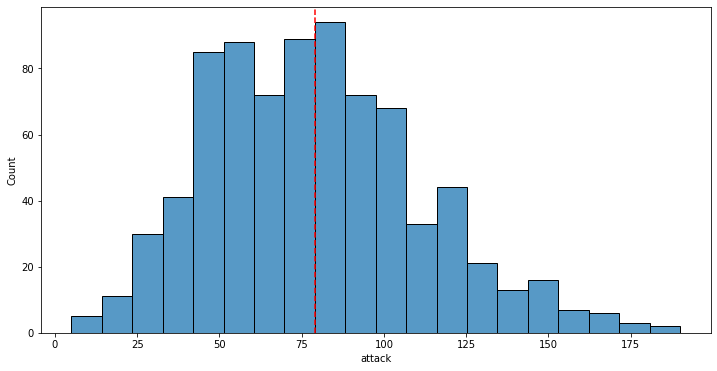

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='attack')
plt.axvline(df['attack'].mean(),linestyle='dashed',color='red') #draw a vertical line showing the average Attack value
plt.show()

The boxplot to show the data variation per type, specially to see the outliers.

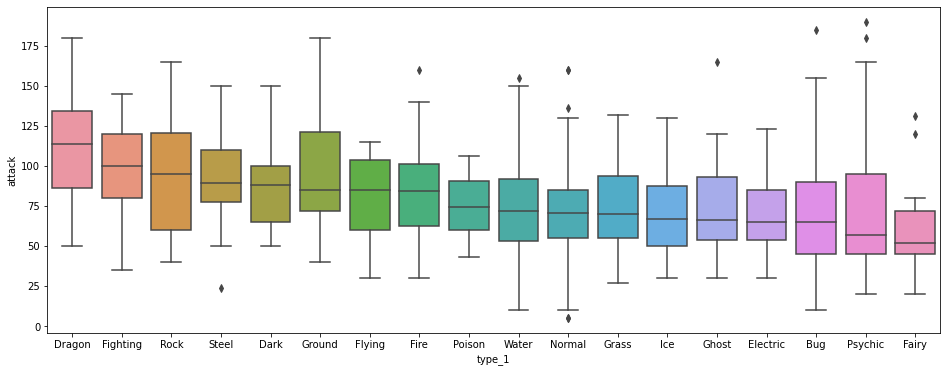

In [23]:
my_order = df.groupby(["type_1"])["attack"].median().sort_values().iloc[::-1].index

plt.figure(figsize=(16,6))
sns.boxplot(x='type_1',y='attack',data=df, order=my_order)
plt.show()

Same idea, histogram for the defense.

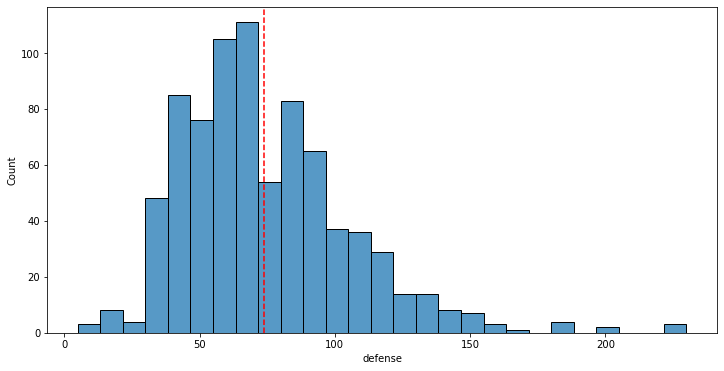

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='defense')
plt.axvline(df['defense'].mean(),linestyle='dashed',color='red') #draw a vertical line showing the average Attack value
plt.show()

Defense variation per type.

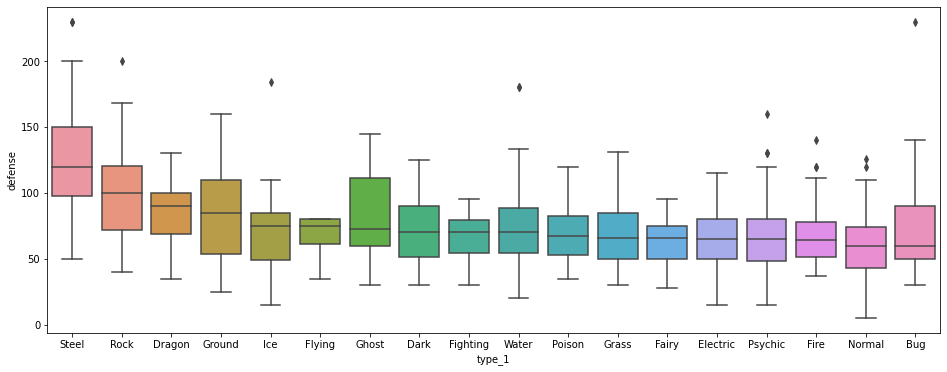

In [25]:
my_order = df.groupby(["type_1"])["defense"].median().sort_values().iloc[::-1].index

plt.figure(figsize=(16,6))
sns.boxplot(x='type_1',y='defense',data=df, order=my_order)
plt.show()

We can see some types with very good attack and defense.

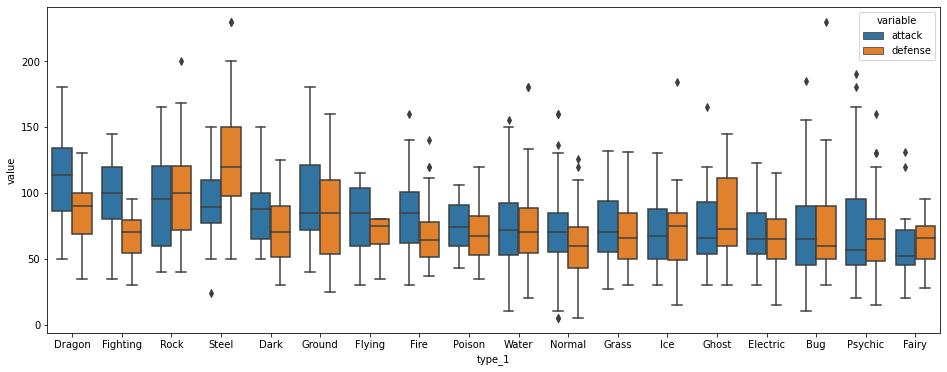

In [26]:
my_order = df.groupby(["type_1"])["attack"].median().sort_values().iloc[::-1].index

lg_data = df.melt(id_vars=['type_1'], value_vars=['attack', 'defense'])

plt.figure(figsize=(16,6))
sns.boxplot(data=lg_data, x='type_1', y='value', hue='variable', order=my_order)
plt.show()

Scatter plot with density to verify the relationship between attack and defense.

<Figure size 900x600 with 0 Axes>

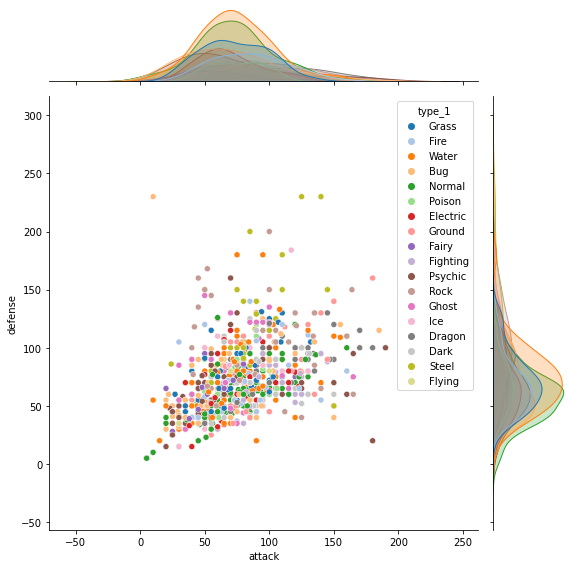

In [28]:
plt.figure(dpi=150)
sns.jointplot(height=8, x='attack',y='defense',data=df, hue='type_1', palette='tab20')
plt.show()

The general goal of using the basics and not so common commands in Python to run basic EDA over the pokemon dataset.